 **Bangla Cyberbullying Classifier**

In [32]:
import os
import nltk
import pandas as pd
import re

In [33]:
import pandas as pd

# Define your class-to-ID mapping
classDict = {'sexual': 0, 'Threat': 1, 'Political': 2, 'troll': 3, 'Neutral': 4}

# Read the Excel file into a DataFrame
df = pd.read_excel("CyberBulling_Dataset_Bangla.xlsx")
df.columns = ['SL', 'Description', 'Label']

# Create the 'category_id' column by mapping labels to IDs
df['category_id'] = df['Label'].map(classDict)

# Display the DataFrame
df.head()

,SL,Description,Label,category_id
0,0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,sexual,0
1,1,আপনার জন্ম প্রক্রিয়ার সময় আপনার মায়ের ভিতর কি ...,sexual,0
2,2,ধজভংগ দের আর ভায়াগ্রা লাগবো না। ধংস হোক এই সব ...,sexual,0
3,3,বোকাচোদা একটা।,sexual,0
4,4,তোর দেশে ফেরার অপেক্ষায় রইলাম। জেলে একটা কামরা...,sexual,0


In [34]:
df.describe(include='all')

,SL,Description,Label,category_id
count,6010.00000,6010,6010,6010.000000
unique,NaN,5860,5,NaN
top,NaN,এই কাংকির ছেলে রাজাকার সবাই তো কুত্তালীগ করে এ...,Political,NaN
freq,NaN,8,1205,NaN
mean,3004.50000,NaN,NaN,2.000166
std,1735.08189,NaN,NaN,1.413802
min,0.00000,NaN,NaN,0.000000
25%,1502.25000,NaN,NaN,1.000000
50%,3004.50000,NaN,NaN,2.000000
75%,4506.75000,NaN,NaN,3.000000


<Axes: xlabel='Label'>

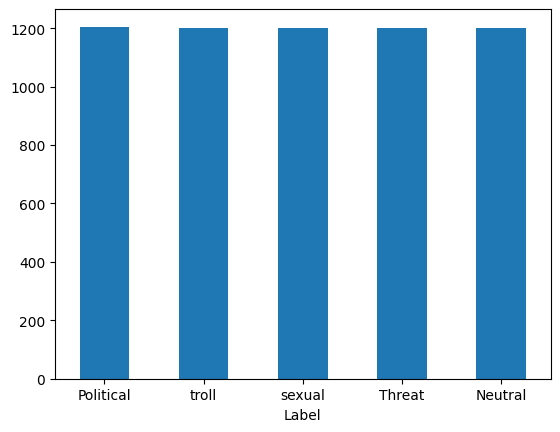

In [35]:
df['Label'].value_counts().plot(kind="bar", rot=0)

In [36]:
#data Cleaning
def clean_sentence(sent):

    sent = re.sub('[?.`*^()!°¢܌Ͱ̰ߒנ~×Ҡߘ:ҰߑÍ|।;!,&%\'@#$><A-Za-z0+-9=./''""_০-৯]', '', sent)
    sent = re.sub(r'(\W)(?=\1)', '', sent)
    sent = re.sub(r'https?:\/\/.*[\r\n]*', '', sent, flags=re.MULTILINE)
    sent = re.sub(r'\<a href', ' ', sent)
    sent = re.sub(r'&amp;', '', sent)
    sent = re.sub(r'<br />', ' ', sent)
    sent = re.sub(r'\'', ' ', sent)
    sent = re.sub(r'ߑͰߑ̰ߒנ', '', sent)
    sent = re.sub(r'ߎɰߎɰߎɍ', '', sent)

    sent = sent.strip()
    return sent

In [37]:
df.loc[15,'Description']

'কুত্তার ঘরে কি ঘোড়ার বাচ্চা আশা করা যায়?? মুরগী কবির এর জারজ এর কাছ থেকে এর চেয়ে আর কি আশা করা যায়?'

In [38]:
for i, sent  in enumerate(df['Description'].tolist()):
    df.loc[i,'clean_sentence'] = clean_sentence(sent)
test = df.loc[15,'clean_sentence']
test

'কুত্তার ঘরে কি ঘোড়ার বাচ্চা আশা করা যায় মুরগী কবির এর জারজ এর কাছ থেকে এর চেয়ে আর কি আশা করা যায়'

In [39]:
#Sentence Tokenization
def tokenized_data(sent):
    tokenized_text = sent.split()
    return tokenized_text

In [40]:
stop_words = {'এ', 'হয়', 'কি', 'কী', 'এর', 'কে', 'যে', 'এই', 'বা', 'সব', 'টি', 'তা',
       'সে', 'তাই', 'সেই', 'তার', 'আগে', 'যদি', 'আছে', 'আমি', 'এবং', 'করে', 'কার', 'এটি', 'হতে', 'যায়',
       'আরও', 'যাক', 'খুব', 'উপর', 'পরে', 'হবে', 'কেন', 'কখন', 'সকল', 'হয়', 'ঠিক', 'একই', 'কোন',
       'ছিল', 'খুবই', 'কোনো', 'অধীন', 'যারা', 'তারা', 'গুলি', 'তাকে', 'সেটা', 'সময়', 'আমার', 'আমরা', 'সবার',
       'উভয়', 'একটা', 'আপনি', 'নিয়ে', 'একটি', 'বন্ধ', 'জন্য', 'শুধু', 'যেটা', 'উচিত', 'মাঝে', 'থেকে', 'করবে',
       'আবার', 'উপরে', 'সেটি', 'কিছু', 'কারণ', 'যেমন', 'তিনি', 'মধ্যে', 'আমাকে', 'করছেন', 'তুলনা', 'তারপর',
       'নিজেই', 'থাকার', 'নিজের', 'পারেন', 'একবার', 'সঙ্গে', 'ইচ্ছা', 'নীচের', 'এগুলো', 'আপনার', 'অধীনে', 'কিংবা',
       'এখানে', 'তাহলে', 'কয়েক', 'জন্যে', 'হচ্ছে', 'তাদের', 'কোথায়', 'কিন্তু', 'নিজেকে', 'যতক্ষণ', 'আমাদের',
       'দ্বারা', 'হয়েছে', ' সঙ্গে', 'সেখানে', 'কিভাবে', 'মাধ্যমে', 'নিজেদের', 'তুলনায়', 'প্রতিটি',
       'তাদেরকে', 'ইত্যাদি', 'সম্পর্কে', 'সর্বাধিক', 'বিরুদ্ধে', 'অন্যান্য'}

def remove_stop_words(text):
    text = [w for w in text if not w in stop_words]
    text = ' '.join(text)
    return text

In [41]:
t_data = tokenized_data(test)
r_word = remove_stop_words(t_data)
print('befor :', test)
print('after :', r_word)

befor : কুত্তার ঘরে কি ঘোড়ার বাচ্চা আশা করা যায় মুরগী কবির এর জারজ এর কাছ থেকে এর চেয়ে আর কি আশা করা যায়
after : কুত্তার ঘরে ঘোড়ার বাচ্চা আশা করা মুরগী কবির জারজ কাছ চেয়ে আর আশা করা


In [42]:
df['clean_data'] = [remove_stop_words(tokenized_data(sent)) for sent in df['clean_sentence'].tolist()]
#del df['sentence']
df.to_csv('cyber_bullying_clean_data.csv', encoding='utf-8', index=False)

In [43]:
#word2vec tranform by n-gram
from sklearn.feature_extraction.text import CountVectorizer
stpGram = {}
word_vectorizerGram = CountVectorizer(analyzer='word', ngram_range=(1, 2), min_df=1, lowercase=False,
                                          token_pattern=u'[\S]+', tokenizer=None)


word_vectorizerGram.fit_transform(df['clean_sentence'])
stpGram = word_vectorizerGram.get_feature_names_out()

print(len(stpGram))

92082


In [44]:
word_vectorizerGram_rsw = CountVectorizer(analyzer='word', ngram_range=(1, 2), min_df=1, lowercase=False,
                                          token_pattern=u'[\S]+', tokenizer=None)

word_vectorizerGram_rsw.fit_transform(df['clean_data'])
stpGram_rsw = word_vectorizerGram_rsw.get_feature_names_out()

print(len(stpGram_rsw))
print('sample of bigram : ',stpGram_rsw[45])

83009
sample of bigram :  অংশ হিসাবে


In [45]:
import numpy as np
def sentence_to_vector_transform(line, stpGram):
    vec = CountVectorizer(analyzer='word', ngram_range=(1, 2), min_df=1, lowercase=False, token_pattern=u'[\S]+',
                            tokenizer=None, vocabulary=stpGram)
    tList = []
    tList.append(line)
    sent = vec.transform(tList)
    sent = sent.toarray()
    sent = np.squeeze(np.asarray(sent))
    return sent

In [53]:
def sentence_to_vector(data, stpGram):
    dataForSVM = []
    colName = []
    dataVec = []
    labels = []
    dataVec.append(colName)

    for idx, sent in enumerate(data):

        sent = sentence_to_vector_transform(sent, stpGram)
        sentLst = list(sent)
        dtList = []
        try:
            dtList.append(df.loc[idx,'category_id'])
            labels.append(df.loc[idx,'category_id'])
            dataForSVM.append(sent)
        except:
            print(idx)
        for item in sentLst:
            dtList.append(item)
        lengthOfEV = len(dtList)
        dataVec.append(dtList)

    return dataForSVM ,labels
dataForSVM ,labels= sentence_to_vector(df['clean_data'], stpGram_rsw)
dataForSVM[0:4]

[array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64)]

In [54]:
#train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataForSVM, labels, test_size=0.3, random_state=0)

In [56]:
print(X_train[0])

[0 0 0 ... 0 0 0]


In [57]:
#Training
from sklearn.svm import SVC
C = 1.0  # SVM regularization parameter
linear_svc = SVC(kernel='linear', C=C)
linear_svc = linear_svc.fit(X_train, y_train)

In [62]:
#model Save
from sklearn.externals import joblib
filename = 'svc_model.sav'
joblib.dump(linear_svc, filename)

ImportError: cannot import name 'joblib' from 'sklearn.externals' (c:\Users\Jobair\miniconda3\envs\my3.8env\lib\site-packages\sklearn\externals\__init__.py)

In [58]:
#ACC Testiing
from sklearn import metrics
from sklearn.metrics import confusion_matrix

def calculate_accuracy(kernel, model):
    y_pred = model.predict(X_test)
    #print the accuracy score of the model
    print(kernel + " accuracy : ",metrics.accuracy_score(y_test, y_pred, normalize = True))
    score = confusion_matrix(y_test, y_pred)
    print('confusion_matrix: \n', score)

# from yellowbrick.classifier import ClassificationReport
# # Instantiate the classification model and visualizer

# def report(model):
#     visualizer = ClassificationReport(model, classes=['Won','Loss'])
#     visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
#     visualizer.score(X_test, y_test) # Evaluate the model on the test data
#     g = visualizer.poof() # Draw/show/poof the data

In [59]:
calculate_accuracy(kernel='linear', model=linear_svc)
#report(model=linear_svc)

linear accuracy :  0.6433721575152523
confusion_matrix: 
 [[193  15  16  70  68]
 [ 21 256   9  36  44]
 [ 14   9 233  44  57]
 [ 28  19  14 208  93]
 [ 14   8  15  49 270]]
